# Lab - 06

## Image Blurring
Blurring is a technique in digital image processing in which we perform a convolution operation between the given image and a predefined low-pass filter kernel.
### What is a kernel?
In the image processing, a kernel, convolution matrix or mask is a small matrix that is used for blurring, sharpening, embossing, edge detection and more. This is done by a convolution between an image and a kernel. 



### Averaging (Mean or Homogeneous filter)
In averaging, we simply take the average of all the pixels under kernel area and replaces the central element with this average. The Average filter is also known as box filter, homogeneous filter, and mean filter.

Average filter has the following properties.
1. It must be odd ordered.
2. The sum of all the elements should be 1.
3. All the elements should be the same.

For a mask of 3x3, that means it has 9 cells. The condition that all the element sum should be equal to 1 can be achieved by dividing each value by 9. As 1/9 + 1/9 + 1/9 + 1/9 + 1/9 + 1/9 + 1/9 + 1/9 + 1/9 = 9/9 = 1

#### Note: The kernel size must be a positive and odd number.

In [1]:
# Necessary imports
import cv2
import numpy as np
import matplotlib.pyplot as pylab
from PIL import Image


In [3]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks

(<Axes: title={'center': 'box_filter_img'}>, None)

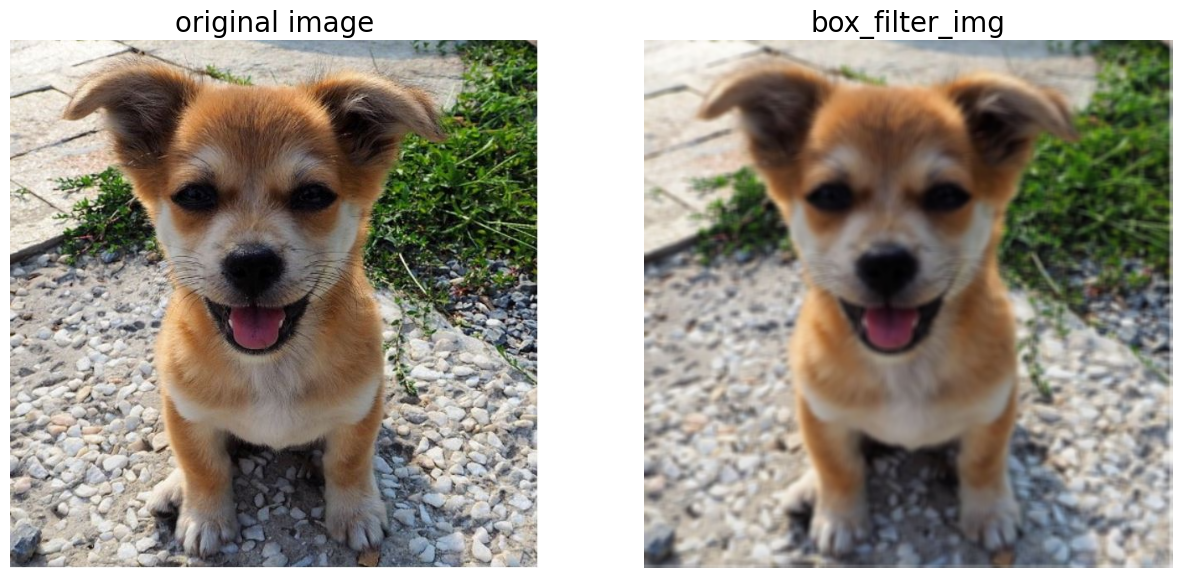

In [6]:

# Import the image
img = cv2.imread('images/Puppy_Dog.jpg')


kernel = np.ones((7,7),np.float32)/49

# Basically, the smallest the kernel, the less visible is the blur.
# In our example, we will use a 5 by 5 kernel.

box_filter_img = cv2.filter2D(img,-1,kernel)

pylab.style.use('ggplot')
pylab.figure(figsize=(15,10))
pylab.subplot(121), plot_image(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 'original image')
pylab.subplot(122), plot_image(cv2.cvtColor(box_filter_img, cv2.COLOR_BGR2RGB), 'box_filter_img')


(<matplotlib.axes._subplots.AxesSubplot at 0x1a4a25adc48>, None)

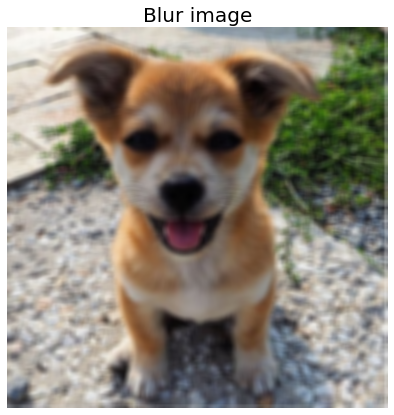

In [12]:
# We can also do the same with a function given by OpenCV:

# Changing the value for size will effect the image, try it 3, 5, 7, 9, 11, 13, 15,...

size = 11
box_filter_img = cv2.blur(img,(size,size))

pylab.figure(figsize=(15,10))
pylab.subplot(121), plot_image(cv2.cvtColor(box_filter_img, cv2.COLOR_BGR2RGB), 'Blur image')

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as pylab
from PIL import Image

def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks
    

In [22]:
from scipy.stats.mstats import gmean
from scipy.stats import hmean 

x = range(25)
x = np.reshape(x,(5,5))
#print(np.mean((x)))
#print(np.sum(x)/9)
ar = x[0:2,1:3]
size = 2
h = (size*size)/(1/np.sum(ar))

print('gmeans',(x[0:2,1:3]))
print('gmeans',h)
print("gg: ", x.shape)

gmeans [[1 2]
 [6 7]]
gmeans 64.0
gg:  (5, 5)


In [19]:
s = 0
for i in ar:
    s = s + (1/i)
print("sum: ", s)
print('sum-sum:', np.sum(s))
print('hmeans: ', 4/np.sum(s))


sum:  [1.16666667 0.64285714]
sum-sum: 1.8095238095238095
hmeans:  2.2105263157894735


In [2]:
# ------------ Testing ------------------- #
def testMeans(img, size):
    
    local_image = np.zeros_like(img)
    m, n = local_image.shape
    for i in range(m):
        for j in range(n):
            arr = img[i:i+size,j:j+size]
            print("\n--- Mean: ", np.mean(arr))
            print(arr)
            if(np.mean(arr)>0):
                local_image[i,j] = int(np.mean(arr))
            else: 
                local_image[i,j] = 1
    return local_image

import numpy as np #from numpy import *
x = range(25)
x = np.reshape(x,(5,5))
y = np.zeros_like(x)
print("\nArray: ")
print(x)

print("\nBefore Update Array")
print(y)

size = 3
y = testMeans(x,size)

print("\nAfter Update Array")
print(y)


Array: 
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

Before Update Array
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

--- Mean:  6.0
[[ 0  1  2]
 [ 5  6  7]
 [10 11 12]]

--- Mean:  7.0
[[ 1  2  3]
 [ 6  7  8]
 [11 12 13]]

--- Mean:  8.0
[[ 2  3  4]
 [ 7  8  9]
 [12 13 14]]

--- Mean:  8.5
[[ 3  4]
 [ 8  9]
 [13 14]]

--- Mean:  9.0
[[ 4]
 [ 9]
 [14]]

--- Mean:  11.0
[[ 5  6  7]
 [10 11 12]
 [15 16 17]]

--- Mean:  12.0
[[ 6  7  8]
 [11 12 13]
 [16 17 18]]

--- Mean:  13.0
[[ 7  8  9]
 [12 13 14]
 [17 18 19]]

--- Mean:  13.5
[[ 8  9]
 [13 14]
 [18 19]]

--- Mean:  14.0
[[ 9]
 [14]
 [19]]

--- Mean:  16.0
[[10 11 12]
 [15 16 17]
 [20 21 22]]

--- Mean:  17.0
[[11 12 13]
 [16 17 18]
 [21 22 23]]

--- Mean:  18.0
[[12 13 14]
 [17 18 19]
 [22 23 24]]

--- Mean:  18.5
[[13 14]
 [18 19]
 [23 24]]

--- Mean:  19.0
[[14]
 [19]
 [24]]

--- Mean:  18.5
[[15 16 17]
 [20 21 22]]

--- Mean:  19.5
[[16 17 18]
 [21 22 23]]

--- 

### Arithmetic Mean Filter
The function meanFilter() processes every pixel in the image (apart from the image borders). Python uses the range function to determine the list of loop iterators for the for loops. Image slicing is then used to extract the 5×5 block around each pixel, and the mean is calculated using the  numpy mean() function. The result is then converted to an integer, and assigned to the filtered image. After the image has been processed, the filtered image is output to a text file.

(<matplotlib.axes._subplots.AxesSubplot at 0x28ecc938f28>, None)

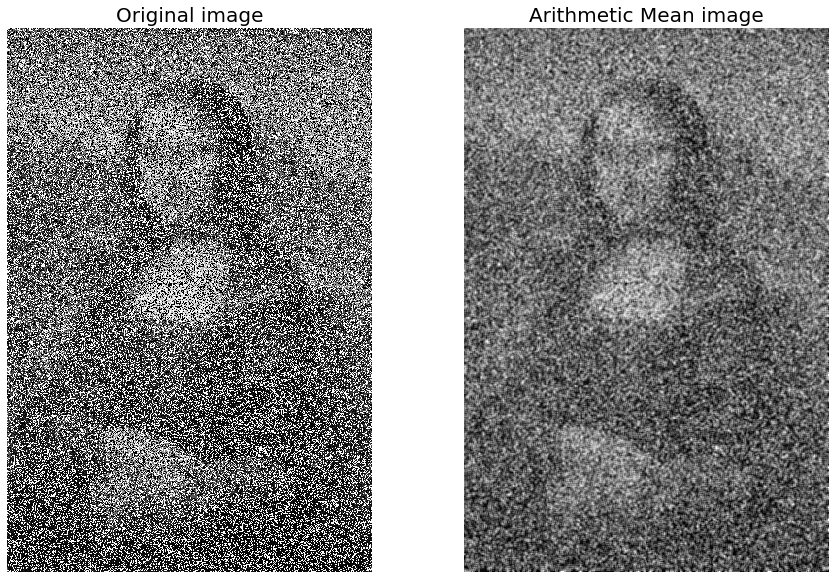

In [6]:
def arithmeticMean(img, size):
    local_image = np.zeros_like(img)
    m, n, _ = local_image.shape
    for i in range(m):
        for j in range(n):
            arr = img[i:i+size,j:j+size]
            if(np.mean(arr)>0):
                local_image[i,j] = int(np.mean(arr))
            else: 
                local_image[i,j] = 1
    return local_image

img = Image.open("images/n1.jpg")
image = np.asarray(img)
size = 3

mean_img = arithmeticMean(image, size)
pylab.figure(figsize=(15,10))
pylab.subplot(121), plot_image(image, 'Original image')
pylab.subplot(122), plot_image(mean_img, 'Arithmetic Mean image')

### Geometric Mean

the geometric mean of two numbers, say 2 and 8, is just the square root of their product, i.e. 

sqrt(2 x 8) = 4

We can apply it to the image by multiplying their Row and Column size. 

The geometric mean can also be expressed as the exponential of the arithmetic mean of logarithms. By using logarithmic identities to transform the formula, the multiplications can be expressed as a sum and the power as a multiplication.


This means that a geometric mean can be simply calculated as an arithmetic mean, i.e. a cv2.boxFilter() of the logarithm of the image values. 


(<matplotlib.axes._subplots.AxesSubplot at 0x28ecd0f3550>, None)

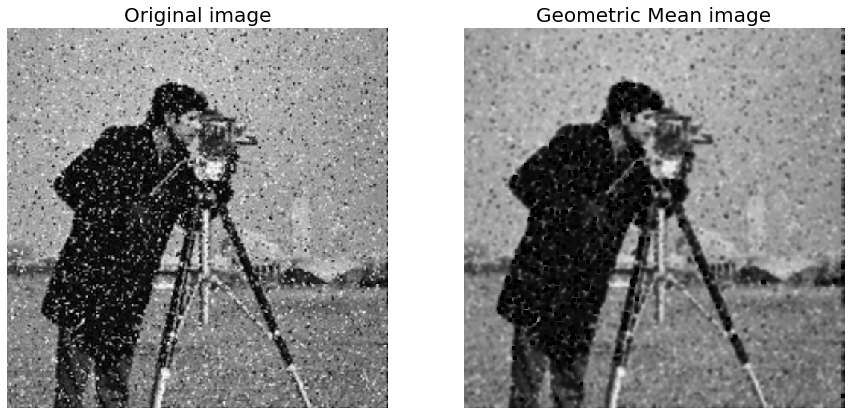

In [7]:
from scipy.stats.mstats import gmean, hmean

def geometicMean(img, size):
    local_image = np.zeros_like(img)
    m, n, _ = local_image.shape
    for i in range(m):
        for j in range(n):
            arr = img[i:i+size,j:j+size]
            if(gmean(arr.flatten())>0):
                local_image[i,j] = int(gmean(arr.flatten()))
            else: 
                local_image[i,j] = 1
    return local_image

img = Image.open("images/p1.jpg")
image = np.asarray(img)
size = 5

mean_img = geometicMean(image, size)
pylab.figure(figsize=(15,10))
pylab.subplot(121), plot_image(image, 'Original image')
pylab.subplot(122), plot_image(mean_img, 'Geometric Mean image')

### Harmonic Means
Black-pixels (pepper noise) are not filtered.

(<matplotlib.axes._subplots.AxesSubplot at 0x1eb5bd270b8>, None)

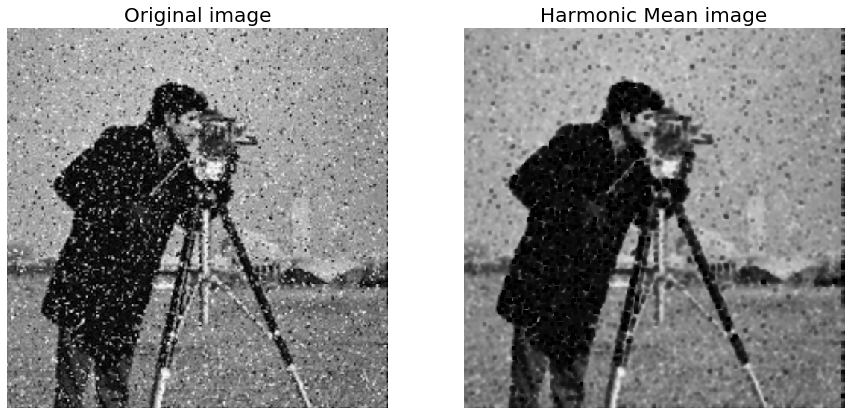

In [15]:
from scipy.stats import hmean 
## ----- You can also use Statistics library
# from statistics import harmonic_mean 

def harmonicMean(img, size):
    local_image = np.zeros_like(img)
    m, n, _ = local_image.shape
    s = 0
    for i in range(m):
        for j in range(n):
            arr = img[i:i+size,j:j+size]
            arr = arr.flatten()
            if (np.min(arr)>0):
                mean = hmean(arr)
            else:
                mean = 1
            local_image[i,j] = mean
    return local_image

img = Image.open("images/p1.jpg")
image = np.asarray(img)
size = 5

mean_img = harmonicMean(image, size)
pylab.figure(figsize=(15,10))
pylab.subplot(121), plot_image(image, 'Original image')
pylab.subplot(122), plot_image(mean_img, 'Harmonic Mean image')

### Contraharmonic mean filter 


(<matplotlib.axes._subplots.AxesSubplot at 0x28ece616438>, None)

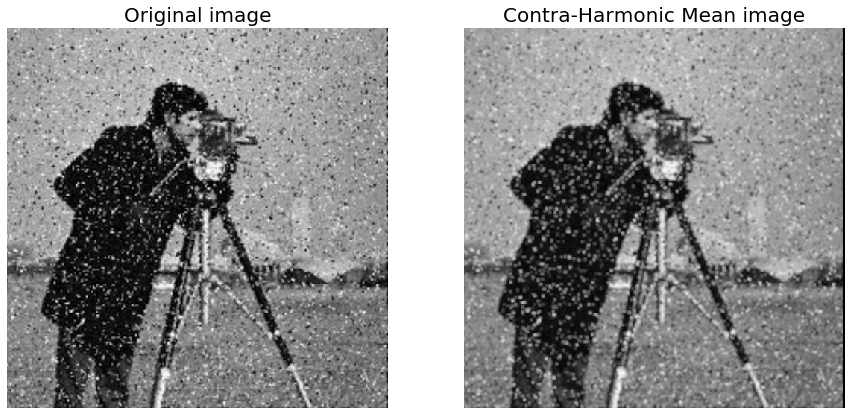

In [10]:
def contraHarmonicMean(img, size, Q):
    local_image = np.zeros_like(img)
    m, n, _ = local_image.shape
    
    for i in range(m):
        for j in range(n-size):
            arr = img[i:i+size,j:j+size]
            arr = arr.flatten()
            pn = 0
            pd = 0
            for k in arr:
                p1 = k**(Q+1)
                p2 = k**(Q)
                pn = pn + p1
                pd = pd + p2
            local_image[i,j] = int(pn/pd)
    return local_image

img = Image.open("images/p1.jpg")
image = np.asarray(img)

size =3
Q = 1.5

mean_img = contraHarmonicMean(image, size, Q)
pylab.figure(figsize=(15,10))
pylab.subplot(121), plot_image(image, 'Original image')
pylab.subplot(122), plot_image(mean_img, 'Contra-Harmonic Mean image')

### Statistics Filters: Median Filter
Excellent for removing both bipolar and unipolar impulse noise

C:\Users\Irfan\Anaconda3\lib\statistics.py:384: RuntimeWarning: overflow encountered in ubyte_scalars
  return (data[i - 1] + data[i])/2


(<matplotlib.axes._subplots.AxesSubplot at 0x1eb5d658630>, None)

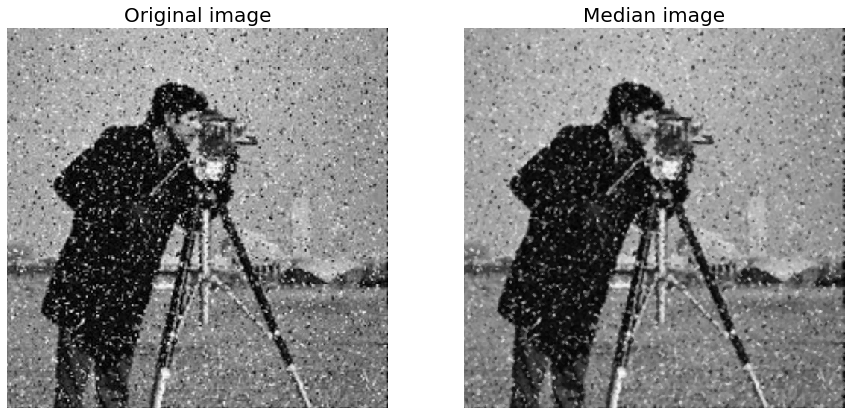

In [19]:
import statistics as st

def medain(img, size):
    local_image = np.zeros_like(img)
    m, n, _ = local_image.shape
    for i in range(m):
        for j in range(n):
            arr = img[i:i+size,j:j+size]
            arr = arr.flatten()
            local_image[i,j]= st.median(arr)

    return local_image

img = Image.open("images/p1.jpg")
image = np.asarray(img)

size = 3

mean_img = medain(image, size)
pylab.figure(figsize=(15,10))
pylab.subplot(121), plot_image(image, 'Original image')
pylab.subplot(122), plot_image(mean_img, 'Median image')

### Statistics Filters: Max Filter
helps in removing pepper noise

(<matplotlib.axes._subplots.AxesSubplot at 0x1eb5dcff5c0>, None)

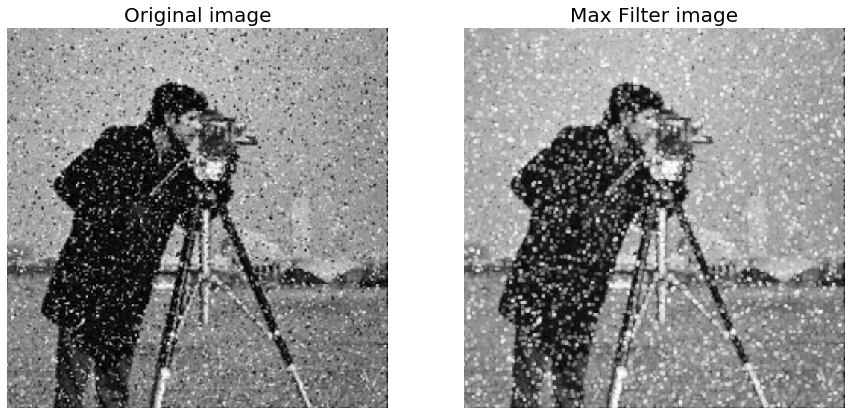

In [20]:
def maxFilter(img, size):
    local_image = np.zeros_like(img)
    m, n, _ = local_image.shape
    for i in range(m):
        for j in range(n):
            arr = img[i:i+size,j:j+size]
            arr = arr.flatten()
            local_image[i,j]= np.max(arr)

    return local_image

img = Image.open("images/p1.jpg")
image = np.asarray(img)

size = 3

mean_img = maxFilter(image, size)
pylab.figure(figsize=(15,10))
pylab.subplot(121), plot_image(image, 'Original image')
pylab.subplot(122), plot_image(mean_img, 'Max Filter image')

### Statistics Filters: Min Filter
helps in removing salt noise

(<matplotlib.axes._subplots.AxesSubplot at 0x1eb5da6b588>, None)

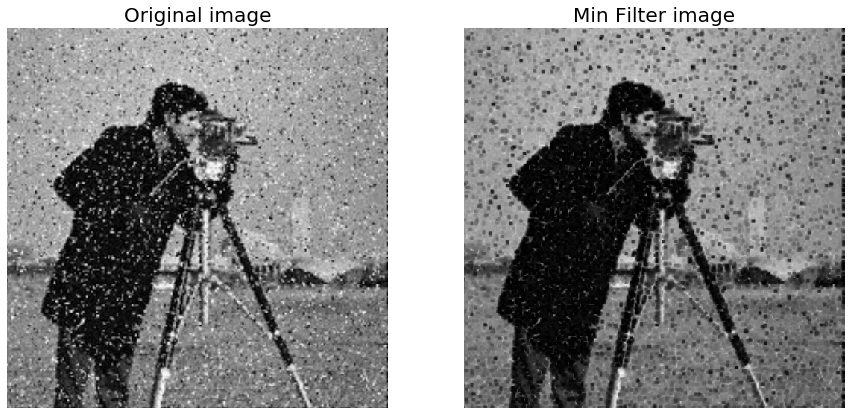

In [21]:
def minFilter(img, size):
    local_image = np.zeros_like(img)
    m, n, _ = local_image.shape
    for i in range(m):
        for j in range(n):
            arr = img[i:i+size,j:j+size]
            arr = arr.flatten()
            local_image[i,j]= np.min(arr)

    return local_image

img = Image.open("images/p1.jpg")
image = np.asarray(img)

size = 3

mean_img = minFilter(image, size)
pylab.figure(figsize=(15,10))
pylab.subplot(121), plot_image(image, 'Original image')
pylab.subplot(122), plot_image(mean_img, 'Min Filter image')

### Statistics Filters: Midpoint Filter
1. Midpoint filter works best for randomly distributed nose (Gaussian or uniform)
2. Not suitable for all kind of noise removal


C:\Users\Irfan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


(<matplotlib.axes._subplots.AxesSubplot at 0x1eb5f347780>, None)

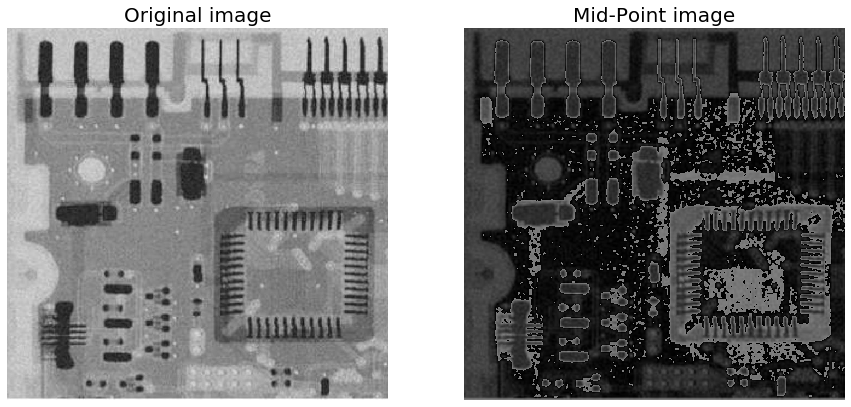

In [26]:
def midPoint(img, size):
    local_image = np.zeros_like(img)
    m, n, _ = local_image.shape
    for i in range(m):
        for j in range(n):
            arr = img[i:i+size,j:j+size]
            arr = arr.flatten()
            local_image[i,j]= int((np.max(arr)+np.min(arr))/2)

    return local_image

img = Image.open("images/CG1.jpg")
image = np.asarray(img)

size = 3

mean_img = midPoint(image, size)
pylab.figure(figsize=(15,10))
pylab.subplot(121), plot_image(image, 'Original image')
pylab.subplot(122), plot_image(mean_img, 'Mid-Point image')